#  Analisis Llamadas

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [127]:
data= pd.read_csv('DATA_FINAL_08.csv',sep=';', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
len(data)

3748392

In [12]:
data.shape

(3748392, 87)

In [129]:
maestro_nodos=data[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].dropna().drop_duplicates()

In [6]:
data[data['CUENTA']==93959347][['CUENTA','FECHA','CANTIDAD_LLAMADAS','CANTIDAD_ADMIN','CANTIDAD_TECNICO']].sort_values('FECHA')

,CUENTA,FECHA,CANTIDAD_LLAMADAS,CANTIDAD_ADMIN,CANTIDAD_TECNICO
991413,93959347,1,0,0,0
3332653,93959347,2,4,3,1
2347193,93959347,3,4,3,1
889820,93959347,4,4,3,1
442665,93959347,5,21,16,5
2017473,93959347,7,25,20,5
2017617,93959347,7,25,20,5
1589696,93959347,10,30,23,7


In [88]:
data_llamadas= pd.read_csv('Cantidad_llamadas_v1.csv',sep=';', header = 0)

In [89]:
data_llamadas[data_llamadas['CUENTA']==93959347]

,CUENTA,MES,CANTIDAD,ADMINISTRATIVO,TECNICO,NODO
349945,93959347,5,4,4,0,SCC
903036,93959347,1,4,3,1,PQP
1477256,93959347,8,4,3,1,SCC
1592205,93959347,9,1,0,1,SCC
3837582,93959347,4,12,9,3,PQP
4710106,93959347,4,5,4,1,SCC


In [81]:
#data_llamadas.

In [90]:
data_llamadas_res=data_llamadas.groupby(['NODO','MES']).sum()

In [91]:
data_llamadas_res.reset_index(inplace=True)

In [93]:
data_llamadas_res

,NODO,MES,CUENTA,CANTIDAD,ADMINISTRATIVO,TECNICO
0,01J,1,406713457,11,5,6
1,01J,2,280873310,17,1,15
2,01J,3,233880664,6,3,3
3,01J,4,75900209,1,0,1
4,01J,5,149219674,2,2,0
...,...,...,...,...,...,...
189505,ZVZ,8,4884082653,256,123,122
189506,ZVZ,9,4855321656,189,113,72
189507,ZVZ,10,3669246288,176,90,82
189508,ZVZ,11,3698568716,249,124,116


In [49]:
resumen_medida=pd.pivot_table(data_llamadas[['MES','NODO','CANTIDAD']], columns='MES', index='NODO',aggfunc=np.sum)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

MES,1,2,3,4,5,6,7,8,9,10,11,12
NODO,,,,,,,,,,,,
01J,11.0,17.0,6.0,1.0,2.0,11.0,9.0,6.0,4.0,14.0,7.0,2.0
01S,126.0,127.0,114.0,92.0,128.0,94.0,105.0,79.0,132.0,151.0,105.0,21.0
02J,NaN,2.0,2.0,6.0,4.0,7.0,6.0,3.0,NaN,2.0,3.0,NaN
02S,138.0,153.0,116.0,108.0,128.0,76.0,73.0,79.0,95.0,80.0,49.0,30.0
03J,16.0,23.0,11.0,6.0,12.0,15.0,22.0,19.0,14.0,8.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,368.0,277.0,263.0,124.0,123.0,140.0,166.0,137.0,133.0,214.0,127.0,42.0
ZVG,151.0,107.0,154.0,105.0,141.0,119.0,121.0,147.0,104.0,132.0,102.0,30.0
ZVS,288.0,252.0,223.0,212.0,354.0,150.0,188.0,158.0,163.0,161.0,205.0,69.0


<AxesSubplot:xlabel='MES'>

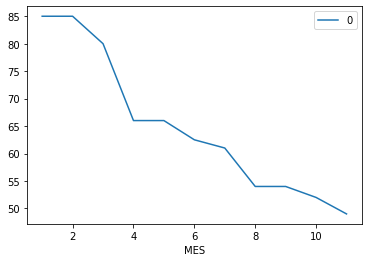

In [50]:
resumen_medida.drop(columns=[12]).median().to_frame().plot()

<AxesSubplot:xlabel='MES'>

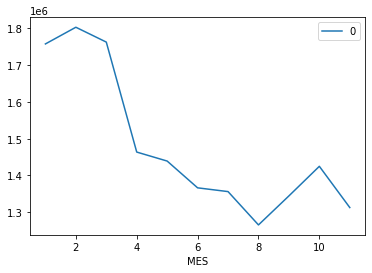

In [51]:
resumen_medida.drop(columns=[12]).sum().to_frame().plot()

In [52]:
###Admin

In [53]:
resumen_medida_admin=pd.pivot_table(data_llamadas[['MES','NODO','ADMINISTRATIVO']], columns='MES', index='NODO',aggfunc=np.sum)
resumen_medida_admin.columns = resumen_medida_admin.columns.droplevel()
resumen_medida_admin

MES,1,2,3,4,5,6,7,8,9,10,11,12
NODO,,,,,,,,,,,,
01J,5.0,1.0,3.0,0.0,2.0,3.0,2.0,2.0,1.0,2.0,4.0,2.0
01S,68.0,87.0,79.0,62.0,71.0,48.0,79.0,45.0,78.0,84.0,63.0,11.0
02J,NaN,0.0,1.0,5.0,4.0,6.0,5.0,1.0,NaN,1.0,1.0,NaN
02S,76.0,113.0,72.0,82.0,66.0,58.0,57.0,58.0,77.0,50.0,30.0,17.0
03J,10.0,16.0,5.0,4.0,7.0,9.0,11.0,14.0,12.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,289.0,198.0,174.0,85.0,82.0,92.0,125.0,105.0,84.0,82.0,70.0,24.0
ZVG,104.0,68.0,108.0,72.0,85.0,78.0,83.0,95.0,49.0,67.0,48.0,13.0
ZVS,197.0,168.0,129.0,146.0,73.0,102.0,132.0,94.0,105.0,88.0,94.0,36.0


<AxesSubplot:xlabel='MES'>

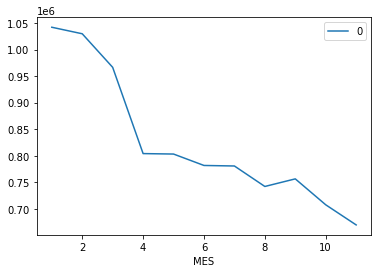

In [54]:
resumen_medida_admin.drop(columns=[12]).sum().to_frame().plot()

In [55]:
## Tecnicas
resumen_medida_tec=pd.pivot_table(data_llamadas[['MES','NODO','TECNICO']], columns='MES', index='NODO',aggfunc=np.sum)
resumen_medida_tec.columns = resumen_medida_tec.columns.droplevel()
resumen_medida_tec

MES,1,2,3,4,5,6,7,8,9,10,11,12
NODO,,,,,,,,,,,,
01J,6.0,15.0,3.0,1.0,0.0,7.0,7.0,4.0,3.0,10.0,3.0,0.0
01S,53.0,37.0,32.0,28.0,57.0,44.0,24.0,33.0,50.0,61.0,38.0,9.0
02J,NaN,2.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,2.0,NaN
02S,56.0,37.0,39.0,24.0,58.0,17.0,12.0,16.0,15.0,27.0,14.0,13.0
03J,6.0,6.0,6.0,2.0,5.0,6.0,9.0,5.0,2.0,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,67.0,70.0,86.0,38.0,39.0,45.0,38.0,29.0,44.0,128.0,52.0,18.0
ZVG,45.0,36.0,41.0,28.0,51.0,36.0,38.0,46.0,53.0,62.0,49.0,13.0
ZVS,90.0,82.0,93.0,61.0,272.0,43.0,49.0,62.0,54.0,72.0,103.0,29.0


<AxesSubplot:xlabel='MES'>

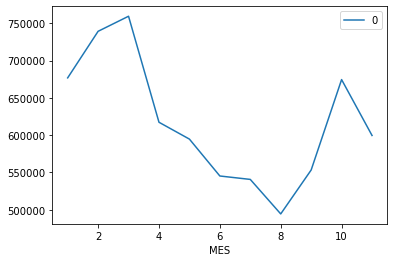

In [57]:
resumen_medida_tec.drop(columns=[12]).sum().to_frame().plot()

In [58]:
resTotal=resumen_medida.drop(columns=[12]).sum().to_frame().merge(resumen_medida_admin.drop(columns=[12]).sum().to_frame(), left_index=True, right_index=True, how='left')
resTotal=resTotal.merge(resumen_medida_tec.drop(columns=[12]).sum().to_frame(), left_index=True, right_index=True, how='left')
resTotal.columns=['Llamadas','Admin','Tecnicas']
resTotal

,Llamadas,Admin,Tecnicas
MES,,,
1,1757937.0,1042188.0,676819.0
2,1803355.0,1029881.0,739298.0
3,1762952.0,966603.0,759505.0
4,1463604.0,803961.0,617274.0
5,1439118.0,803097.0,594673.0
6,1366247.0,781568.0,545177.0
7,1356007.0,780578.0,540585.0
8,1265313.0,741955.0,494295.0
9,1344271.0,756282.0,553210.0


<AxesSubplot:xlabel='MES'>

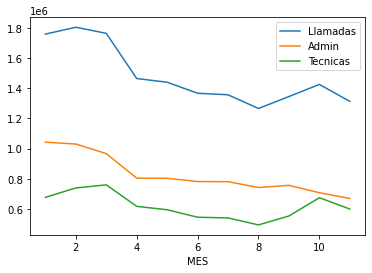

In [59]:
resTotal.plot()

In [101]:
data_llamadas_total=pd.read_csv('llamadas_Totales.csv',sep=';', header = 0)

In [102]:
data_llamadas_total

,MES,NODO,CANTIDAD
0,1,HASISX,47
1,1,BT5,387
2,1,MLZ,316
3,1,V6B,369
4,1,NFI297,18
...,...,...,...
214245,12,R1E,1
214246,12,AT47,1
214247,12,SMSM45,2
214248,12,QI16,1


In [103]:
data_llamadas_total_res=data_llamadas_total.groupby(['NODO','MES']).sum()
data_llamadas_total_res.reset_index(inplace=True)
data_llamadas_total_res

,NODO,MES,CANTIDAD
0,01J,1,15
1,01J,2,18
2,01J,3,6
3,01J,4,11
4,01J,5,3
...,...,...,...
214245,ZVZ,8,281
214246,ZVZ,9,232
214247,ZVZ,10,239
214248,ZVZ,11,316


In [104]:
data_llamadas_total

,MES,NODO,CANTIDAD
0,1,HASISX,47
1,1,BT5,387
2,1,MLZ,316
3,1,V6B,369
4,1,NFI297,18
...,...,...,...
214245,12,R1E,1
214246,12,AT47,1
214247,12,SMSM45,2
214248,12,QI16,1


In [105]:
data_total=data_llamadas_res.merge(data_llamadas_total_res,left_on=['NODO','MES'],right_on=['NODO','MES'],how='outer')

In [108]:
data_total.fillna(0,inplace=True)

In [117]:
data_total

,NODO,MES,CUENTA,CANTIDAD_x,ADMINISTRATIVO,TECNICO,CANTIDAD_y,comp_tarifa
0,01J,1,406713457.0,11.0,5.0,6.0,15,0.733333
1,01J,2,280873310.0,17.0,1.0,15.0,18,0.944444
2,01J,3,233880664.0,6.0,3.0,3.0,6,1.000000
3,01J,4,75900209.0,1.0,0.0,1.0,11,0.090909
4,01J,5,149219674.0,2.0,2.0,0.0,3,0.666667
...,...,...,...,...,...,...,...,...
214245,ZPZP02,10,0.0,0.0,0.0,0.0,13,0.000000
214246,ZPZP02,12,0.0,0.0,0.0,0.0,1,0.000000
214247,ZPZP13,11,0.0,0.0,0.0,0.0,3,0.000000
214248,ZPZP13,12,0.0,0.0,0.0,0.0,5,0.000000


In [ ]:
#resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [112]:
data_total['comp_tarifa']=data_total['CANTIDAD_x']/data_total['CANTIDAD_y']

In [118]:
resumen_medida=pd.pivot_table(data_total[['MES','NODO','comp_tarifa']], columns='MES', index='NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

MES,1,2,3,4,5,6,7,8,9,10,11,12
NODO,,,,,,,,,,,,
01J,0.733333,0.944444,1.000000,0.090909,0.666667,0.733333,0.562500,0.750000,0.666667,0.583333,0.466667,0.500000
01S,0.851351,0.894366,0.912000,0.851852,0.864865,0.878505,0.807692,0.814433,0.830189,0.853107,0.833333,0.750000
01V,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02J,0.000000,0.166667,0.222222,0.500000,0.400000,0.333333,0.400000,0.187500,0.000000,0.181818,0.600000,0.000000
02S,0.862500,0.900000,0.834532,0.864000,0.775758,0.710280,0.760417,0.745283,0.931373,0.677966,0.583333,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,0.867925,0.893548,0.827044,0.677596,0.754601,0.689655,0.761468,0.752747,0.671717,0.832685,0.830065,0.711864
ZVG,0.843575,0.737931,0.814815,0.820312,0.796610,0.798658,0.707602,0.812155,0.812500,0.874172,0.784615,0.789474
ZVS,0.789041,0.871972,0.874510,0.788104,0.746835,0.789474,0.835556,0.790000,0.747706,0.741935,0.740072,0.741935


In [119]:
resumen_medida['ene_oct']=resumen_medida[11]-resumen_medida[1]

In [121]:
resumen_medida['ene_oct'].describe()

count    16152.000000
mean        -0.087518
std          0.178606
min         -1.000000
25%         -0.165188
50%         -0.078122
75%          0.000000
max          1.000000
Name: ene_oct, dtype: float64

In [120]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.18808118993175116

In [123]:
resumen_medida['ET']=np.where(resumen_medida['ene_oct']<=corte,1,0)

In [124]:
resumen_medida

MES,1,2,3,4,5,6,7,8,9,10,11,12,ene_oct,ET
NODO,,,,,,,,,,,,,,
01J,0.733333,0.944444,1.000000,0.090909,0.666667,0.733333,0.562500,0.750000,0.666667,0.583333,0.466667,0.500000,-0.266667,1
01S,0.851351,0.894366,0.912000,0.851852,0.864865,0.878505,0.807692,0.814433,0.830189,0.853107,0.833333,0.750000,-0.018018,0
01V,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
02J,0.000000,0.166667,0.222222,0.500000,0.400000,0.333333,0.400000,0.187500,0.000000,0.181818,0.600000,0.000000,0.600000,0
02S,0.862500,0.900000,0.834532,0.864000,0.775758,0.710280,0.760417,0.745283,0.931373,0.677966,0.583333,0.857143,-0.279167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVD,0.867925,0.893548,0.827044,0.677596,0.754601,0.689655,0.761468,0.752747,0.671717,0.832685,0.830065,0.711864,-0.037859,0
ZVG,0.843575,0.737931,0.814815,0.820312,0.796610,0.798658,0.707602,0.812155,0.812500,0.874172,0.784615,0.789474,-0.058960,0
ZVS,0.789041,0.871972,0.874510,0.788104,0.746835,0.789474,0.835556,0.790000,0.747706,0.741935,0.740072,0.741935,-0.048969,0


In [134]:
maestro_nodos

,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,ZG2,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
1,HBP1,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID
2,PPA4D,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1
3,9BZ,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA
4,SNJ,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1
...,...,...,...,...,...,...
3584383,LFD1,REGION ORIENTE,SANBOY,BOYACA,TUNJA,TUNJA SUR
3587577,14B13B,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,CASTILLA
3641379,LBS1,REGION OCCIDENTE,CALI,CALI NORTE,CALI,CALI NORTE DISTRITO 2
3709544,QS23B,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,OLAYA


In [130]:
resumen_medida_desc=resumen_medida.merge(maestro_nodos,left_index=True,right_on='COD_NODO',how='left')

In [131]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['CIUDAD'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

In [132]:
resumen_medida_desc_rel

ET,0,1
CIUDAD,,
ACACIAS,0.709677,0.290323
ANAPOIMA,0.428571,0.571429
ARMENIA,0.888889,0.111111
BARRANCABERMEJA,0.652174,0.347826
BARRANQUILLA,0.800373,0.199627
...,...,...
VILLAVICENCIO,0.818182,0.181818
YOPAL,0.882353,0.117647
YUMBO,0.966667,0.033333


<AxesSubplot:xlabel='CIUDAD'>

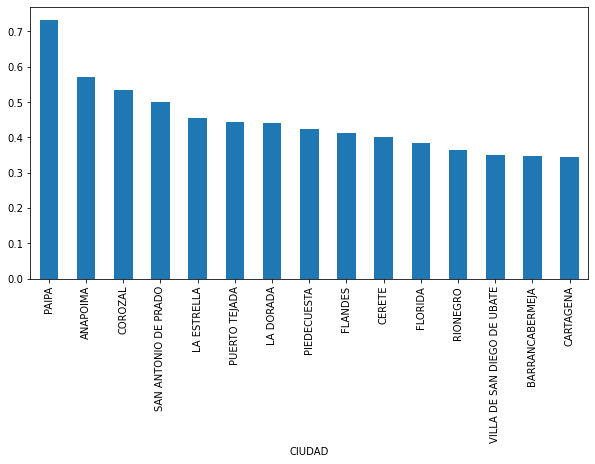

In [133]:
resumen_medida_desc_rel[1].sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

In [141]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['AREA'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

<AxesSubplot:xlabel='AREA'>

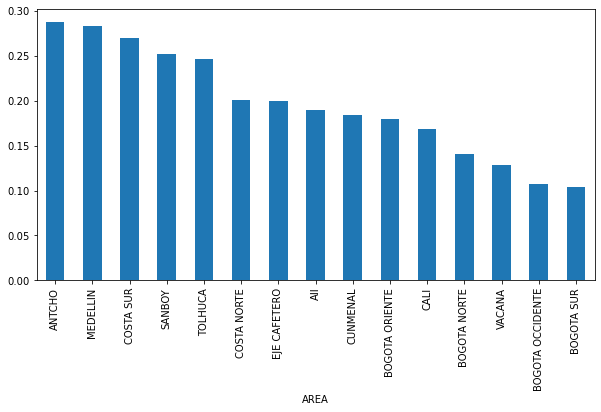

In [142]:
resumen_medida_desc_rel[1].sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

In [ ]:
AREA

In [7]:
data_foco=data[['CUENTA','COD_NODO','FECHA','CANTIDAD_LLAMADAS','CANTIDAD_ADMIN','CANTIDAD_TECNICO']].sort_values(['CUENTA','FECHA']).dropna()

In [138]:
data_foco=data_foco[['CUENTA','COD_NODO','FECHA','CANTIDAD_LLAMADAS','CANTIDAD_ADMIN','CANTIDAD_TECNICO']].groupby(['COD_NODO','FECHA']).sum()

In [139]:
data_foco.reset_index(inplace=True)

In [140]:
data_foco

,COD_NODO,FECHA,CUENTA,CANTIDAD_LLAMADAS,CANTIDAD_ADMIN,CANTIDAD_TECNICO
0,01J,1,273830257,0,0,0
1,01J,2,292164076,3,0,3
2,01J,3,861501451,18,4,13
3,01J,4,439446421,16,5,10
4,01J,5,216048637,1,1,0
...,...,...,...,...,...,...
149987,ago-01,7,1467528703,126,87,37
149988,ago-01,8,7233247511,451,294,152
149989,ago-01,9,1450936070,104,76,24
149990,ago-01,10,1281290643,107,66,38


In [142]:
data_foco['CANTIDAD_LLAMADAS_N']=data_foco.groupby('COD_NODO')['CANTIDAD_LLAMADAS'].diff(-1)

In [143]:
data_foco

,COD_NODO,FECHA,CUENTA,CANTIDAD_LLAMADAS,CANTIDAD_ADMIN,CANTIDAD_TECNICO,CANTIDAD_LLAMADAS_N
0,01J,1,273830257,0,0,0,-3.0
1,01J,2,292164076,3,0,3,-15.0
2,01J,3,861501451,18,4,13,2.0
3,01J,4,439446421,16,5,10,15.0
4,01J,5,216048637,1,1,0,0.0
...,...,...,...,...,...,...,...
149987,ago-01,7,1467528703,126,87,37,-325.0
149988,ago-01,8,7233247511,451,294,152,347.0
149989,ago-01,9,1450936070,104,76,24,-3.0
149990,ago-01,10,1281290643,107,66,38,-193.0


In [ ]:
data['CUENTA_N']=tablaBase['index_N']=tablaBase.groupby('ID')['index'].shift(periods=-1)

In [ ]:
#tablaBase['index_N']=tablaBase.groupby('ID')['index'].shift(periods=-1)

In [33]:
data['COD_NODO'].nunique()

15882

In [34]:
data.describe()

,CUENTA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,OP_CLARO,CANTIDAD,PENETRACION,OCUPACION_DW,OCUPACION_UP,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO
count,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,...,3.691531e+06,3.691531e+06,3.391975e+06,3.614554e+06,3.662728e+06,3.162999e+06,3.507214e+06,3.221058e+06,3.691531e+06,3.691531e+06
mean,5.021393e+07,-1.504672e-02,-5.203565e-03,-1.582225e-02,-4.220476e-04,-4.578763e-03,-1.319766e-02,-5.989768e-03,-3.430804e-03,-5.514871e-02,...,1.181265e+00,2.144164e+00,3.906250e-01,5.084993e-01,4.494307e-01,1.271766e+00,1.338653e+00,9.790414e-01,8.096045e-02,5.952885e-01
std,2.850738e+07,1.241560e-01,7.226600e-02,1.257225e-01,2.069474e-02,6.785440e-02,1.147941e-01,7.759589e-02,5.899487e-02,2.299634e-01,...,1.410256e+00,1.219985e+00,2.403954e+00,1.560323e-01,1.508046e-01,1.965219e+00,1.722602e+00,7.281601e-01,4.924042e-01,1.157517e+00
min,3.070000e+02,-9.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.376013e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.563920e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,3.077778e-01,4.013881e-01,3.423322e-01,4.642514e-01,8.435897e-01,4.591879e-01,0.000000e+00,0.000000e+00
50%,4.730464e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,3.678161e-01,5.081735e-01,4.427638e-01,9.256882e-01,1.112853e+00,8.373859e-01,0.000000e+00,0.000000e+00
75%,7.657398e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,3.000000e+00,4.435484e-01,6.138598e-01,5.512111e-01,1.648786e+00,1.485097e+00,1.357674e+00,0.000000e+00,1.000000e+00
max,9.969995e+07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.200000e+01,1.200000e+01,3.125000e+03,1.045716e+00,1.063611e+00,3.215254e+02,1.840000e+02,3.435232e+01,1.000000e+01,1.200000e+01


In [35]:
data['FECHA'].max()

11

# PLAN
    1. listar Nodos
    2. Calcular medida tarifa
    3. Ordenar en pivot por mes
    4. Calcular dif Ene_Mayo y dif Ene_Nov
    5. Agrupar
    6. Identificar causas (arbol, cluster u otros)
    
##  Tener en cuenta campos
* 'CD_BLANCOS_CAMBIOS_SERVICIO'
* analisis diferentes por INVOLUNTARIO



In [36]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

In [37]:
data.head()

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,1.027704,1.438391,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.542274,1.309582,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,3.211042,1.116071,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.117672,1.008526,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,0.739663,0.734568,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1


In [38]:
data['INVOLUNTARIO']=np.where(data['CARTERA']==0,0,np.where(data['CARTERA']=='0',0,-1))
data['VOLUNTARIO']=np.where(data['CARTERA']==0,-1,np.where(data['CARTERA']=='0',-1,0))

In [39]:
data[['INVOLUNTARIO','VOLUNTARIO']].value_counts().to_frame().sort_index()

,,0
INVOLUNTARIO,VOLUNTARIO,
-1,0,514009
0,-1,3234383


In [40]:
def pieChart(col):
    A = col.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%", colors=['silver','red'])
    plt.axis("equal")
    plt.show()    

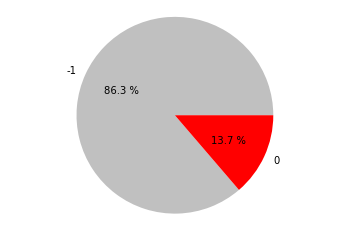

In [41]:
pieChart(data['VOLUNTARIO'])

In [42]:
data['CARTERA'].unique()

array([0, -1, 1, 2, 6, -4, 3, -12, -2, 5, 4, '0', '-1', '3', '2', '1',
       '4', '5', 'NG', -9, -6, -25, -3, -16, -36], dtype=object)

In [43]:
data[['FECHA']].value_counts()

FECHA
6        608997
5        410284
7        354526
3        348981
4        345570
8        330090
11       305675
10       291903
9        290993
1        235981
2        225392
dtype: int64

In [44]:
#data[seleccion_variables].sort_values('COD_NODO')

In [45]:
data_total=data.copy()

### Seleccion variables para medida tarifa

In [46]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','CANTIDAD_LLAMADAS','PROM_RENTA']
# no hay precio mega Movistart

In [47]:
data[seleccion_variables].isnull().sum()

COD_NODO                           0
FECHA                              0
INVOLUNTARIO                       0
CD_BLANCOS_CAMBIOS_SERVICIO        0
CANTIDAD_LLAMADAS                  0
PROM_RENTA                     56861
dtype: int64

In [48]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
CANTIDAD_LLAMADAS              0.000000
PROM_RENTA                     0.015169
dtype: float64

In [49]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,CANTIDAD_LLAMADAS,PROM_RENTA
count,3.748392e+06,3.748392e+06,3748392.0,3.748392e+06,3.691531e+06
mean,6.094396e+00,-1.371279e-01,0.0,3.300594e+00,1.017697e+05
std,2.876352e+00,3.439823e-01,0.0,5.180332e+00,1.740937e+04
min,1.000000e+00,-1.000000e+00,0.0,0.000000e+00,1.134200e+04
25%,4.000000e+00,0.000000e+00,0.0,0.000000e+00,8.991400e+04
50%,6.000000e+00,0.000000e+00,0.0,1.000000e+00,1.010430e+05
75%,8.000000e+00,0.000000e+00,0.0,4.000000e+00,1.114260e+05
max,1.100000e+01,0.000000e+00,0.0,5.580000e+02,2.421450e+05


In [50]:
#alfa=com/nuestro

In [51]:
data_medida=data[seleccion_variables].copy()

In [52]:
#variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']
variables_tarifa=['CANTIDAD_LLAMADAS']

In [53]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [54]:
#data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
#                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
#                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
#                                             )))

In [59]:
#data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [56]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,CANTIDAD_LLAMADAS,PROM_RENTA,comp_tarifa
0,ZG2,8,0,0,3,133632.0,3
1,HBP1,3,0,0,8,107735.0,8
2,PPA4D,3,0,0,4,102163.0,4
3,9BZ,8,0,0,0,89209.0,0
4,SNJ,7,0,0,1,105915.0,1
...,...,...,...,...,...,...,...
3748387,1GV,11,0,0,6,95346.0,6
3748388,CVB,11,0,0,1,126325.0,1
3748389,BTC,6,0,0,0,92790.0,0
3748390,P04,9,0,0,5,103679.0,5


In [147]:
data_medida['FECHA'].max()

11

In [60]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','comp_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,11
COD_NODO,,,,,,,,,,,
01J,0.0,0.750000,1.285714,2.666667,0.333333,0.200000,3.000000,NaN,1.750000,NaN,7.000000
01S,0.0,1.400000,2.384615,1.915254,3.638298,3.600000,3.578947,4.521739,4.842105,4.975610,9.416667
02J,0.0,NaN,0.000000,NaN,0.500000,NaN,0.500000,14.000000,2.000000,NaN,NaN
02S,0.0,3.230769,2.210526,2.575000,3.937500,4.692308,1.900000,8.277778,2.533333,6.348837,1.916667
03J,0.0,1.000000,0.800000,1.000000,1.750000,2.600000,4.000000,2.000000,2.500000,9.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
ZVG,0.0,1.368421,1.695652,1.822581,1.734266,3.366197,4.352941,3.333333,4.187500,3.058824,2.793103
ZVS,0.0,1.964286,2.093750,2.583333,3.920000,2.477941,3.026042,4.083333,3.794872,5.000000,5.219512
ZVT,0.0,0.583333,1.833333,2.608696,4.666667,1.333333,7.500000,3.923077,3.500000,2.333333,5.333333


In [61]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,CANTIDAD_LLAMADAS,PROM_RENTA,comp_tarifa
925942,01S,1,-1,0,0,89601.0,0
1020694,01S,1,-1,0,0,89601.0,0
1003990,01S,1,0,0,0,89601.0,0
993910,01S,1,-1,0,0,89601.0,0
972454,01S,1,0,0,0,89601.0,0
...,...,...,...,...,...,...,...
956036,01S,11,0,0,4,90819.0,4
957764,01S,11,-1,0,8,90819.0,8
960932,01S,11,0,0,6,90819.0,6
935732,01S,11,-1,0,0,90819.0,0


In [62]:
resumen_medida.isnull().sum()

FECHA
1     2558
2     2628
3     2367
4     2165
5     2187
6     2115
7     2598
8     2296
9     1961
10    1911
11    1924
dtype: int64

In [63]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.161063
2     0.165470
3     0.149037
4     0.136318
5     0.137703
6     0.133170
7     0.163581
8     0.144566
9     0.123473
10    0.120325
11    0.121143
dtype: float64

<AxesSubplot:xlabel='FECHA'>

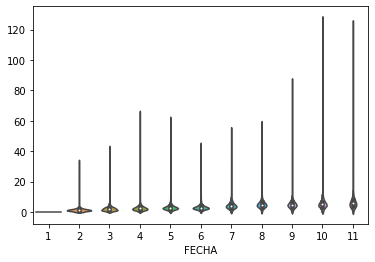

In [64]:
sns.violinplot(data=resumen_medida)

<AxesSubplot:xlabel='FECHA'>

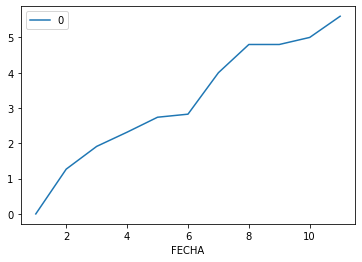

In [65]:
resumen_medida.median().to_frame().plot()

### Medellin

In [66]:
data_medellin=data[data['CIUDAD']=='MEDELLIN']
data_medida_medellin=data_medellin[seleccion_variables].copy()
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']
data_medida_medellin['comp_tarifa']=data_medida_medellin[variables_tarifa].min(axis=1)
#data_medida_medellin['operador_menor_tarifa']=np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))
data_medida_medellin['ALFA_tarifa']=np.where(data_medida_medellin['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida_medellin['comp_tarifa']/data_medida_medellin['PROM_RENTA'])
resumen_medida_medellin=pd.pivot_table(data_medida_medellin[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida_medellin.columns = resumen_medida_medellin.columns.droplevel()
#resumen_medida
resumen_medida_medellin1=resumen_medida_medellin.copy()
resumen_medida_medellin1.median().to_frame().plot()

KeyError: "None of [Index(['AVG_TARIFA_TIGO', 'AVG_TARIFA_ETB', 'AVG_TARIFA_MOVISTAR'], dtype='object')] are in the [columns]"

<AxesSubplot:xlabel='FECHA'>

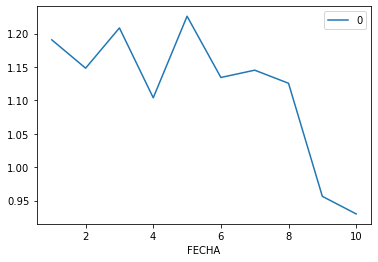

In [170]:
data_medellin=data[data['CIUDAD']=='MANIZALES']
data_medida_medellin=data_medellin[seleccion_variables].copy()
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']
data_medida_medellin['comp_tarifa']=data_medida_medellin[variables_tarifa].min(axis=1)
data_medida_medellin['operador_menor_tarifa']=np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))
data_medida_medellin['ALFA_tarifa']=np.where(data_medida_medellin['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida_medellin['comp_tarifa']/data_medida_medellin['PROM_RENTA'])
resumen_medida_medellin=pd.pivot_table(data_medida_medellin[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida_medellin.columns = resumen_medida_medellin.columns.droplevel()
#resumen_medida
resumen_medida_manizales1=resumen_medida_medellin.copy()
resumen_medida_manizales1.median().to_frame().plot()

<AxesSubplot:xlabel='FECHA'>

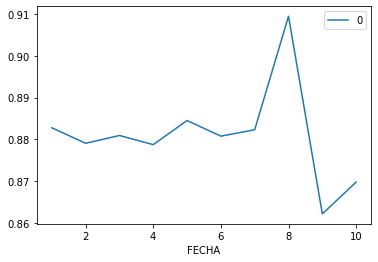

In [171]:
data_medellin=data[data['CIUDAD']=='BOGOTA']
data_medida_medellin=data_medellin[seleccion_variables].copy()
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']
data_medida_medellin['comp_tarifa']=data_medida_medellin[variables_tarifa].min(axis=1)
data_medida_medellin['operador_menor_tarifa']=np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida_medellin['comp_tarifa']==data_medida_medellin['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))
data_medida_medellin['ALFA_tarifa']=np.where(data_medida_medellin['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida_medellin['comp_tarifa']/data_medida_medellin['PROM_RENTA'])
resumen_medida_medellin=pd.pivot_table(data_medida_medellin[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida_medellin.columns = resumen_medida_medellin.columns.droplevel()
#resumen_medida
resumen_medida_bog=resumen_medida_medellin.copy()
resumen_medida_bog.median().to_frame().plot()

In [172]:
resTotal=resumen_medida.median().to_frame().merge(resumen_medida_bog.median().to_frame(), left_index=True, right_index=True, how='left')
resTotal=resTotal.merge(resumen_medida_manizales1.median().to_frame(), left_index=True, right_index=True, how='left')
resTotal=resTotal.merge(resumen_medida_medellin1.median().to_frame(), left_index=True, right_index=True, how='left')
resTotal.columns=['Nacional','Medellín','Manizales','Bogotá']
resTotal

,Nacional,Medellín,Manizales,Bogotá
FECHA,,,,
1,0.976559,0.882790,1.190619,1.146380
2,0.974808,0.879085,1.148186,1.150806
3,0.974402,0.880946,1.208448,1.149002
4,0.976436,0.878760,1.103830,1.146997
5,0.977812,0.884515,1.225918,1.143812
6,0.973474,0.880784,1.134254,1.139859
7,0.973728,0.882326,1.145176,1.131505
8,0.998418,0.909436,1.125601,1.162965
9,0.880032,0.862206,0.956339,0.841933


<AxesSubplot:xlabel='FECHA'>

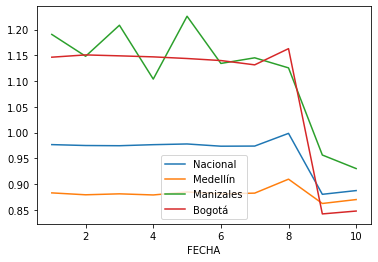

In [173]:
resTotal.plot()

In [67]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [68]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,11,ene_oct,ene_may
count,13324.0,13254.000000,13515.000000,13717.000000,13695.000000,13767.000000,13284.000000,13586.000000,13921.000000,13971.000000,13958.000000,12665.000000,12941.000000
mean,0.0,1.425804,2.165153,2.633200,3.054394,3.139247,4.415818,5.159708,5.230038,5.512128,6.268019,5.470217,3.026141
std,0.0,1.169388,1.660840,1.991331,2.170149,2.012007,2.786815,2.878424,3.318142,3.789410,4.224922,3.200354,1.783947
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.769231,1.136364,1.542373,2.000000,2.092105,2.889722,3.555556,3.500000,3.612903,3.895191,3.708333,2.000000
50%,0.0,1.269231,1.913043,2.315789,2.739130,2.825758,4.000000,4.800000,4.800000,5.000000,5.600000,5.000000,2.750000
75%,0.0,1.834804,2.846154,3.304348,3.666667,3.754242,5.375000,6.260467,6.333333,6.700000,7.750000,6.666667,3.666667
max,0.0,34.000000,43.000000,66.000000,62.000000,45.000000,55.000000,59.000000,87.000000,127.666667,124.900000,127.666667,43.250000


<AxesSubplot:xlabel='FECHA'>

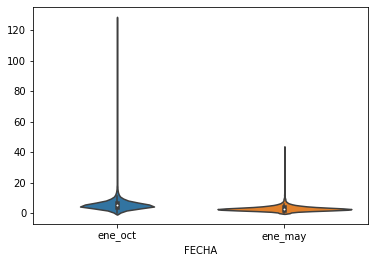

In [69]:
sns.violinplot(data=resumen_medida[['ene_oct','ene_may']])

<AxesSubplot:>

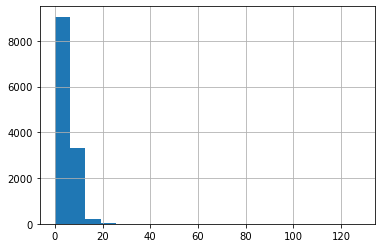

In [70]:
resumen_medida['ene_oct'].hist(bins=20)

<AxesSubplot:>

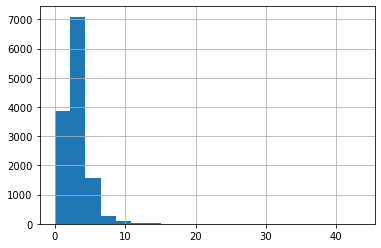

In [71]:
resumen_medida['ene_may'].hist(bins=20)

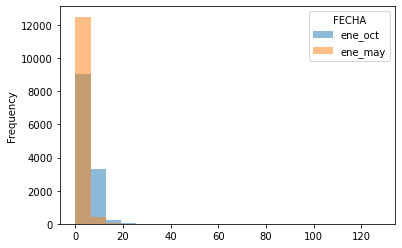

In [74]:
ax = resumen_medida[['ene_oct','ene_may']].plot.hist(bins=20, alpha=0.5)

In [75]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,11,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,,
01J,0.0,0.750000,1.285714,2.666667,0.333333,0.200000,3.000000,NaN,1.750000,NaN,7.000000,NaN,0.333333
01S,0.0,1.400000,2.384615,1.915254,3.638298,3.600000,3.578947,4.521739,4.842105,4.975610,9.416667,4.975610,3.638298
02J,0.0,NaN,0.000000,NaN,0.500000,NaN,0.500000,14.000000,2.000000,NaN,NaN,NaN,0.500000
02S,0.0,3.230769,2.210526,2.575000,3.937500,4.692308,1.900000,8.277778,2.533333,6.348837,1.916667,6.348837,3.937500
03J,0.0,1.000000,0.800000,1.000000,1.750000,2.600000,4.000000,2.000000,2.500000,9.333333,NaN,9.333333,1.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVG,0.0,1.368421,1.695652,1.822581,1.734266,3.366197,4.352941,3.333333,4.187500,3.058824,2.793103,3.058824,1.734266
ZVS,0.0,1.964286,2.093750,2.583333,3.920000,2.477941,3.026042,4.083333,3.794872,5.000000,5.219512,5.000000,3.920000
ZVT,0.0,0.583333,1.833333,2.608696,4.666667,1.333333,7.500000,3.923077,3.500000,2.333333,5.333333,2.333333,4.666667


In [76]:
resumen_medida.isnull().sum()

FECHA
1          2558
2          2628
3          2367
4          2165
5          2187
6          2115
7          2598
8          2296
9          1961
10         1911
11         1924
ene_oct    3217
ene_may    2941
dtype: int64

In [77]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.161063
2          0.165470
3          0.149037
4          0.136318
5          0.137703
6          0.133170
7          0.163581
8          0.144566
9          0.123473
10         0.120325
11         0.121143
ene_oct    0.202556
ene_may    0.185178
dtype: float64

In [78]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [79]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.128, 25.533]",12642
"(25.533, 51.067]",22
"(51.067, 76.6]",0
"(76.6, 102.133]",0
"(102.133, 127.667]",1


In [80]:
len(resumen_medida)

15882

In [81]:
resumen_medida['ene_oct'].quantile(0.10)

2.5

In [82]:
(resumen_medida['ene_oct']<=-0.25).sum()

0

In [83]:
(resumen_medida['ene_oct']<=-0.25).sum()/len(resumen_medida)

0.0

In [84]:
len(resumen_medida)

15882

In [85]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

3.392857142857143

In [86]:
len(resumen_medida[resumen_medida['ene_oct']<=corte])

2534

### Descripción Críticos

In [87]:
maestro_nodos=data[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].dropna().drop_duplicates()

In [88]:
len(maestro_nodos)

13687

In [89]:
maestro_nodos['COD_NODO'].value_counts()

A2C       1
VSO1      1
4A7012    1
2VE       1
4D3023    1
         ..
FZ1       1
3C3013    1
TE1       1
LOM       1
LCU       1
Name: COD_NODO, Length: 13687, dtype: int64

In [90]:
maestro_nodos

,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,ZG2,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL
1,HBP1,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID
2,PPA4D,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1
3,9BZ,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA
4,SNJ,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1
...,...,...,...,...,...,...
3584383,LFD1,REGION ORIENTE,SANBOY,BOYACA,TUNJA,TUNJA SUR
3587577,14B13B,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,CASTILLA
3641379,LBS1,REGION OCCIDENTE,CALI,CALI NORTE,CALI,CALI NORTE DISTRITO 2
3709544,QS23B,REGION CENTRO,BOGOTA ORIENTE,RESTREPO,BOGOTA,OLAYA


In [91]:
maestro_nodos[maestro_nodos['COD_NODO']=='LC33B']

,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
1592,LC33B,REGION CENTRO,BOGOTA NORTE,SABANA NORTE,LA CALERA,TOCANCIPA


In [92]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,11,ene_oct,ene_may,bin_alfa
COD_NODO,,,,,,,,,,,,,,
01J,0.0,0.750000,1.285714,2.666667,0.333333,0.200000,3.000000,NaN,1.750000,NaN,7.000000,NaN,0.333333,NaN
01S,0.0,1.400000,2.384615,1.915254,3.638298,3.600000,3.578947,4.521739,4.842105,4.975610,9.416667,4.975610,3.638298,"(-0.128, 25.533]"
02J,0.0,NaN,0.000000,NaN,0.500000,NaN,0.500000,14.000000,2.000000,NaN,NaN,NaN,0.500000,NaN
02S,0.0,3.230769,2.210526,2.575000,3.937500,4.692308,1.900000,8.277778,2.533333,6.348837,1.916667,6.348837,3.937500,"(-0.128, 25.533]"
03J,0.0,1.000000,0.800000,1.000000,1.750000,2.600000,4.000000,2.000000,2.500000,9.333333,NaN,9.333333,1.750000,"(-0.128, 25.533]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVG,0.0,1.368421,1.695652,1.822581,1.734266,3.366197,4.352941,3.333333,4.187500,3.058824,2.793103,3.058824,1.734266,"(-0.128, 25.533]"
ZVS,0.0,1.964286,2.093750,2.583333,3.920000,2.477941,3.026042,4.083333,3.794872,5.000000,5.219512,5.000000,3.920000,"(-0.128, 25.533]"
ZVT,0.0,0.583333,1.833333,2.608696,4.666667,1.333333,7.500000,3.923077,3.500000,2.333333,5.333333,2.333333,4.666667,"(-0.128, 25.533]"


In [93]:
sel_var=['DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']

In [94]:
resumen_medida_desc=resumen_medida.merge(maestro_nodos,left_index=True,right_on='COD_NODO',how='left')

In [95]:
resumen_medida_desc['ET']=np.where(resumen_medida_desc['ene_oct']<=corte,1,0)

In [96]:
resumen_medida_desc

,1,2,3,4,5,6,7,8,9,10,...,ene_oct,ene_may,bin_alfa,COD_NODO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ET
526140.0,0.0,0.750000,1.285714,2.666667,0.333333,0.200000,3.000000,NaN,1.750000,NaN,...,NaN,0.333333,NaN,01J,REGION COSTA,COSTA SUR,CORDOBA SUCRE,MONTERIA,CORDOBA SUCRE DISTRITO 3,0
10702.0,0.0,1.400000,2.384615,1.915254,3.638298,3.600000,3.578947,4.521739,4.842105,4.975610,...,4.975610,3.638298,"(-0.128, 25.533]",01S,REGION CENTRO,BOGOTA NORTE,SUBA,BOGOTA,GAITANA,0
126864.0,0.0,NaN,0.000000,NaN,0.500000,NaN,0.500000,14.000000,2.000000,NaN,...,NaN,0.500000,NaN,02J,REGION COSTA,COSTA SUR,CORDOBA SUCRE,MONTERIA,CORDOBA SUCRE DISTRITO 4,0
22605.0,0.0,3.230769,2.210526,2.575000,3.937500,4.692308,1.900000,8.277778,2.533333,6.348837,...,6.348837,3.937500,"(-0.128, 25.533]",02S,REGION CENTRO,BOGOTA NORTE,SUBA,BOGOTA,GAITANA,0
261888.0,0.0,1.000000,0.800000,1.000000,1.750000,2.600000,4.000000,2.000000,2.500000,9.333333,...,9.333333,1.750000,"(-0.128, 25.533]",03J,REGION COSTA,COSTA SUR,CORDOBA SUCRE,MONTERIA,CORDOBA SUCRE DISTRITO 4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389378.0,0.0,1.368421,1.695652,1.822581,1.734266,3.366197,4.352941,3.333333,4.187500,3.058824,...,3.058824,1.734266,"(-0.128, 25.533]",ZVG,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 2,1
216450.0,0.0,1.964286,2.093750,2.583333,3.920000,2.477941,3.026042,4.083333,3.794872,5.000000,...,5.000000,3.920000,"(-0.128, 25.533]",ZVS,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 2,0
294709.0,0.0,0.583333,1.833333,2.608696,4.666667,1.333333,7.500000,3.923077,3.500000,2.333333,...,2.333333,4.666667,"(-0.128, 25.533]",ZVT,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,MARSELLA,1
10582.0,0.0,1.343750,0.952381,2.222222,2.157895,2.989247,2.838983,5.962963,5.875000,6.277778,...,6.277778,2.157895,"(-0.128, 25.533]",ZVZ,REGION CENTRO,BOGOTA NORTE,SABANA NORTE,ZIPAQUIRA,ZIPAQUIRA,0


<AxesSubplot:xlabel='DIVISION'>

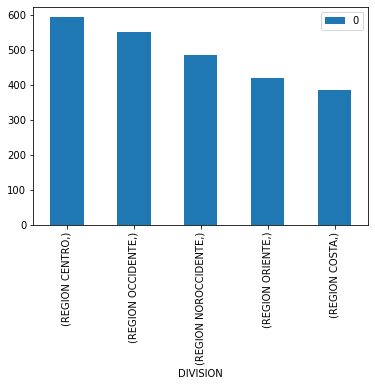

In [97]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['DIVISION']].value_counts().to_frame().plot.bar()

<AxesSubplot:xlabel='ZONA'>

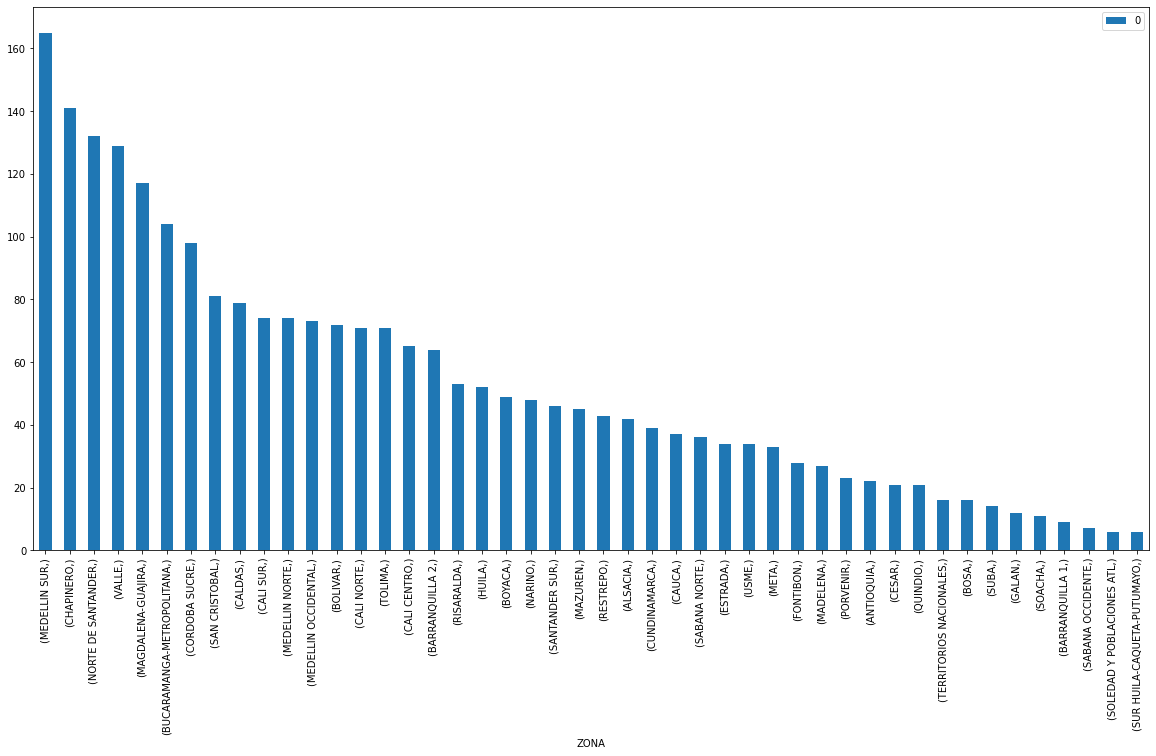

In [98]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['ZONA']].value_counts().to_frame().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='CIUDAD'>

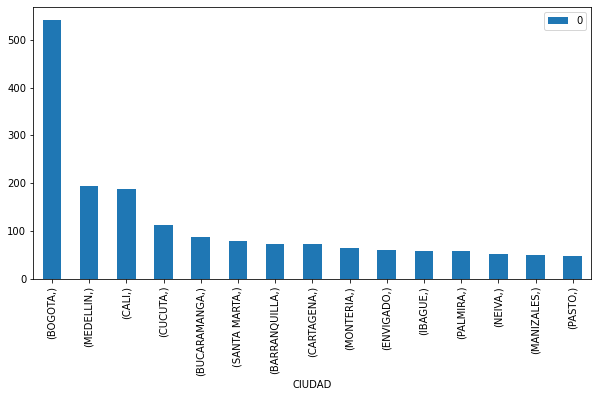

In [104]:
resumen_medida_desc[resumen_medida_desc['ET']==1][['CIUDAD']].value_counts().to_frame().head(15).plot.bar(figsize=(10,5))

In [100]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['CIUDAD'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

<AxesSubplot:xlabel='CIUDAD'>

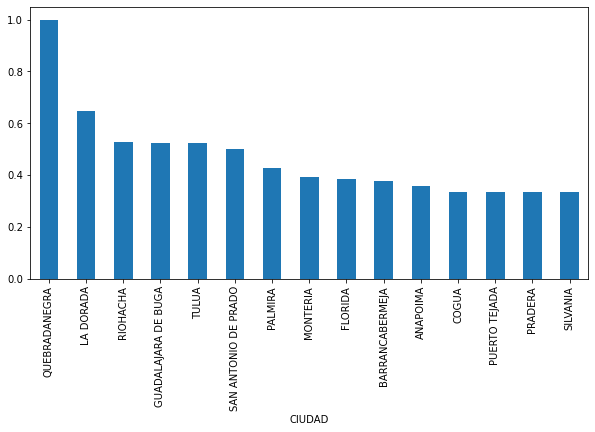

In [105]:
resumen_medida_desc_rel[1].sort_values(ascending=False).head(15).plot.bar(figsize=(10,5))

### Usuarios

In [106]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [107]:
### Ususarios
data.columns
#CANTIDAD_LLAMADAS,  CANT_USER

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

In [110]:
data_causal.groupby('CIUDAD')['CANT_USER','CANTIDAD_churn'].sum()

<ipython-input-110-f0f0c89b21dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_causal.groupby('CIUDAD')['CANT_USER','CANTIDAD_churn'].sum()


,CANT_USER,CANTIDAD_churn
CIUDAD,,
ACACIAS,3461663.0,40147.0
ANAPOIMA,105168.0,505.0
ARMENIA,17098681.0,229101.0
BARRANCABERMEJA,3312278.0,37566.0
BARRANQUILLA,27344269.0,340650.0
...,...,...
VILLAMARIA,2741303.0,31476.0
VILLAVICENCIO,17463155.0,265143.0
YOPAL,9549034.0,97473.0


In [111]:
res_usuario=pd.pivot_table(data_causal[['CIUDAD','ET','CANT_USER']], columns=['ET'],index=['CIUDAD'], aggfunc=np.sum, fill_value=0)
res_usuario.columns = res_usuario.columns.droplevel()
res_usuario

ET,0,1
CIUDAD,,
ACACIAS,3046025,415638
ANAPOIMA,88836,16332
ARMENIA,15913416,1185265
BARRANCABERMEJA,1681426,1630852
BARRANQUILLA,26539624,804645
...,...,...
VILLAMARIA,2671894,69409
VILLAVICENCIO,16045160,1417995
YOPAL,8317998,1231036


In [112]:
res_usuario['ind']=res_usuario[1]/(res_usuario[0]+res_usuario[1])

In [113]:
res_usuario[res_usuario['ind']!=0].sort_values('ind', ascending=False)[0]

CIUDAD
QUEBRADANEGRA                    0
LA DORADA                   205725
GUADALAJARA DE BUGA        1563023
TULUA                      5129983
RIOHACHA                   2280566
                            ...   
SOACHA                    35738849
MELGAR                     1407149
SOLEDAD                   11211472
MOSQUERA                  11245966
SANTANDER DE QUILICHAO     1910206
Name: 0, Length: 82, dtype: int64

<Figure size 432x288 with 0 Axes>

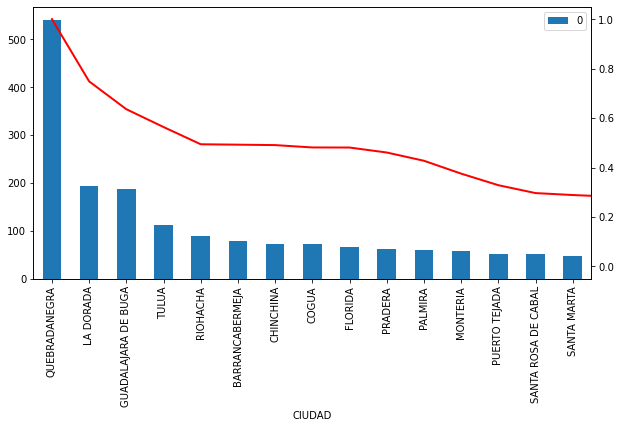

In [116]:
fig = plt.figure()
ax = resumen_medida_desc[resumen_medida_desc['ET']==1][['CIUDAD']].value_counts().to_frame().head(15).plot.bar(figsize=(10,5))
ax2 = ax.twinx()
#ax2.plot(frecuencia['claim'].values, linestyle='-', linewidth=2.0,color='red')
ax2.plot(res_usuario[res_usuario['ind']!=0].sort_values('ind', ascending=False)['ind'], linestyle='-', linewidth=2.0,color='red')
plt.show();

## Fin Usuarios

In [75]:
resumen_medida_desc_rel=pd.crosstab(index=resumen_medida_desc['ZONA'],
            columns=resumen_medida_desc['ET'], margins=True, normalize='index')

<AxesSubplot:xlabel='ZONA'>

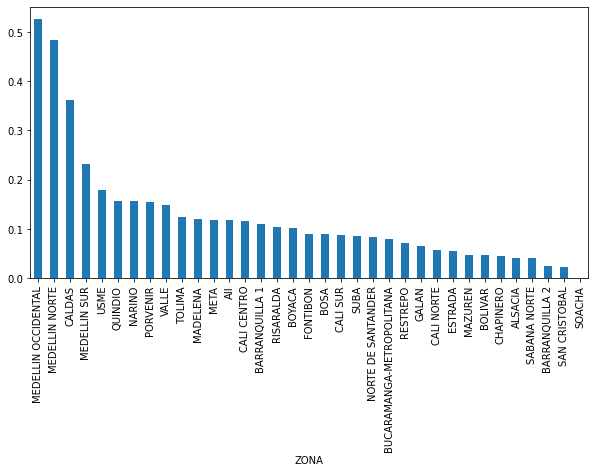

In [76]:
resumen_medida_desc_rel[1].sort_values(ascending=False).plot.bar(figsize=(10,5))

In [77]:
resumen_medida_desc_rel[1].sort_values(ascending=False)

ZONA
MEDELLIN OCCIDENTAL          0.525210
MEDELLIN NORTE               0.483871
CALDAS                       0.360825
MEDELLIN SUR                 0.231544
USME                         0.178744
QUINDIO                      0.156522
NARINO                       0.156069
PORVENIR                     0.154185
VALLE                        0.149254
TOLIMA                       0.124481
MADELENA                     0.120000
META                         0.118227
All                          0.117987
CALI CENTRO                  0.116732
BARRANQUILLA 1               0.110390
RISARALDA                    0.104972
BOYACA                       0.101852
FONTIBON                     0.089189
BOSA                         0.088983
CALI SUR                     0.088050
SUBA                         0.086124
NORTE DE SANTANDER           0.083067
BUCARAMANGA-METROPOLITANA    0.080128
RESTREPO                     0.071006
GALAN                        0.064885
CALI NORTE                   0.056940
ESTRADA

In [322]:
pd.crosstab(index=resumen_medida_desc['CIUDAD'],
            columns=resumen_medida_desc['ET'], margins=True).sort_values(1,ascending=False)

ET,0,1,All
CIUDAD,,,
All,8552,1144,9696
MEDELLIN,567,424,991
BOGOTA,4385,325,4710
CALI,782,74,856
MANIZALES,124,70,194
IBAGUE,211,30,241
PASTO,146,27,173
CUCUTA,287,26,313
BARRANQUILLA,489,26,515


In [323]:
resumen_medida_desc.to_csv('nodos_criticos_tarifas.csv',index=False)

###  Segunda parte

In [237]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [238]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [239]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [240]:
data_causal['ET'].value_counts()

0    3346566
1     401826
Name: ET, dtype: int64

In [241]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.8928
1    0.1072
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [242]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,NaN,0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID,NaN,0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1,NaN,0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,-0.139428,0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,2.063867,0.0,2.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,FLORIDABLANCA,DISTRITO FLORIDA 1,NaN,0
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,0.441224,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.160395,0
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,1.873057,0.0,1.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 3,-0.078399,0


In [243]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3.748392e+06,3748392.0,3748392.0,3.748392e+06
mean,-1.504672e-02,-5.203565e-03,-1.582225e-02,-4.220476e-04,-4.578763e-03,-1.319766e-02,-5.989768e-03,-3.430804e-03,-5.514871e-02,-1.234396e-03,0.0,-1.677253e-03,0.0,-7.176411e-05,0.0,0.0,-5.975896e-05
std,1.241560e-01,7.226600e-02,1.257225e-01,2.069474e-02,6.785440e-02,1.147941e-01,7.759589e-02,5.899487e-02,2.299634e-01,3.527904e-02,0.0,4.208976e-02,0.0,9.137688e-03,0.0,0.0,7.900836e-03
min,-9.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,0.0,-3.000000e+00,0.0,-3.000000e+00,0.0,0.0,-2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00
max,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00


In [244]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [245]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

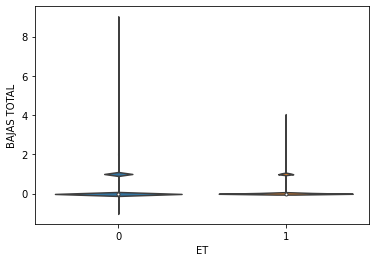

In [246]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

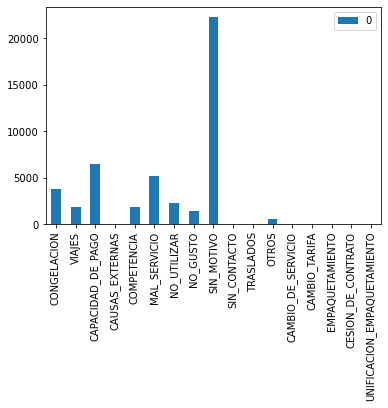

In [247]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

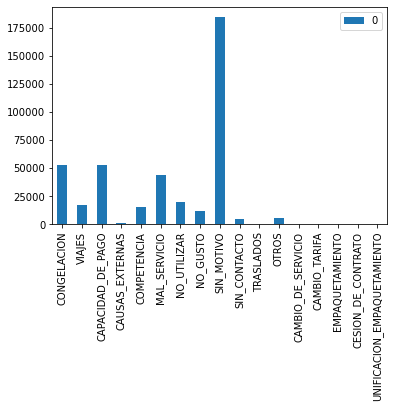

In [248]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [249]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,56401,3853,52548
VIAJES,19505,1897,17608
CAPACIDAD_DE_PAGO,59308,6529,52779
CAUSAS_EXTERNAS,1582,0,1582
COMPETENCIA,17163,1852,15311
MAL_SERVICIO,49470,5232,44238
NO_UTILIZAR,22452,2271,20181
NO_GUSTO,12860,1391,11469
SIN_MOTIVO,206719,22288,184431
SIN_CONTACTO,4627,0,4627


In [250]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=True)
resumen_causa_nor

,total,critico,normal
EMPAQUETAMIENTO,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000
UNIFICACION_EMPAQUETAMIENTO,0.001084,0.000135,0.001198
CAMBIO_TARIFA,0.001301,0.000000,0.001459
CAUSAS_EXTERNAS,0.007653,0.000000,0.008578
SIN_CONTACTO,0.022383,0.000000,0.025088
OTROS,0.030413,0.025350,0.031025
NO_GUSTO,0.062210,0.062410,0.062186


<Figure size 432x288 with 0 Axes>

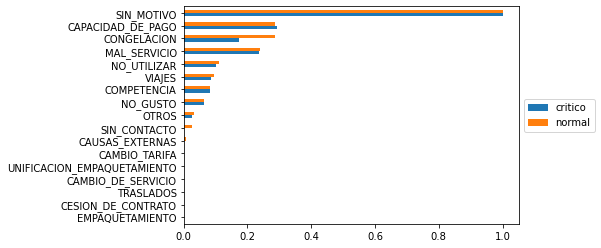

In [251]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [252]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [253]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=True)
resumen_causa_nor

,total,critico,normal,dif
CONGELACION,0.272839,0.172873,0.284920,-0.112046
SIN_CONTACTO,0.022383,0.000000,0.025088,-0.025088
VIAJES,0.094355,0.085113,0.095472,-0.010359
CAUSAS_EXTERNAS,0.007653,0.000000,0.008578,-0.008578
NO_UTILIZAR,0.108611,0.101893,0.109423,-0.007530
OTROS,0.030413,0.025350,0.031025,-0.005675
MAL_SERVICIO,0.239310,0.234745,0.239862,-0.005117
CAMBIO_TARIFA,0.001301,0.000000,0.001459,-0.001459
UNIFICACION_EMPAQUETAMIENTO,0.001084,0.000135,0.001198,-0.001064
EMPAQUETAMIENTO,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

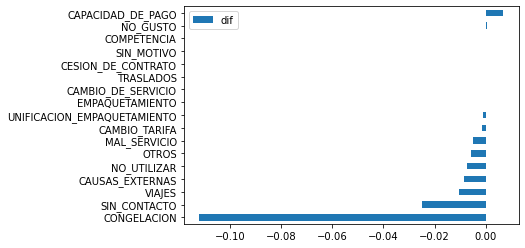

In [254]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [255]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 7


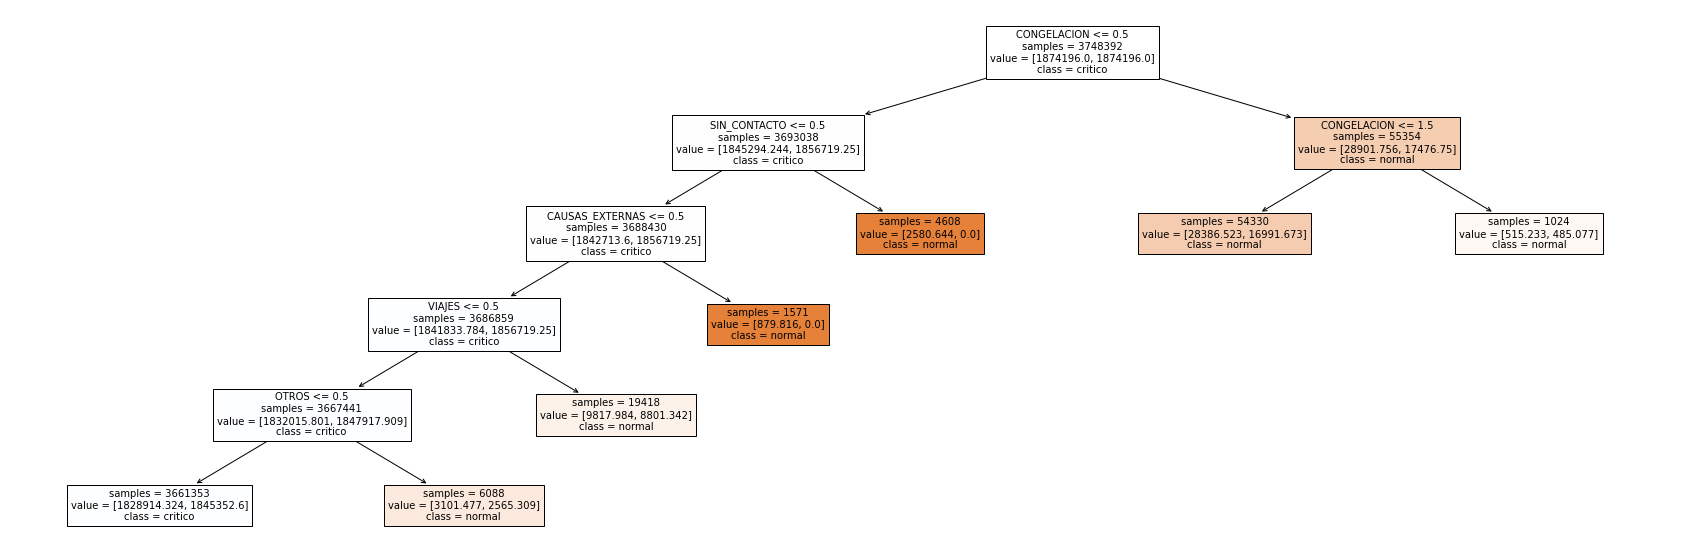

In [256]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

### Próximos pasos
* diferenciar entre voluntarios e involuntarios
* quitar variable blanco
* validar cambio tendencia ene-may

### Voluntario

In [78]:
data=data[data['INVOLUNTARIO']==0]

In [79]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [80]:
data[seleccion_variables].isnull().sum()

COD_NODO                             0
FECHA                                0
INVOLUNTARIO                         0
CD_BLANCOS_CAMBIOS_SERVICIO          0
AVG_TARIFA_TIGO                1362579
AVG_TARIFA_ETB                 2624365
AVG_TARIFA_MOVISTAR            1514298
PROM_RENTA                       15507
dtype: int64

In [81]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.421279
AVG_TARIFA_ETB                 0.811396
AVG_TARIFA_MOVISTAR            0.468188
PROM_RENTA                     0.004794
dtype: float64

In [82]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,3.234383e+06,3234383.0,3234383.0,1.871804e+06,610018.000000,1.720085e+06,3.218876e+06
mean,6.073886e+00,0.0,0.0,1.244205e+05,92561.595422,1.036952e+05,1.028364e+05
std,2.803414e+00,0.0,0.0,1.254575e+04,19596.725265,9.651585e+03,1.751058e+04
min,1.000000e+00,0.0,0.0,7.199000e+04,79900.000000,7.199000e+04,1.134200e+04
25%,4.000000e+00,0.0,0.0,1.180000e+05,79900.000000,9.790000e+04,9.085100e+04
50%,6.000000e+00,0.0,0.0,1.267850e+05,79900.000000,1.054000e+05,1.025950e+05
75%,8.000000e+00,0.0,0.0,1.300000e+05,111525.000000,1.129000e+05,1.123210e+05
max,1.100000e+01,0.0,0.0,1.635700e+05,149900.000000,1.129000e+05,2.421450e+05


In [83]:
#alfa=com/nuestro

In [84]:
data_medida=data[seleccion_variables].copy()

In [85]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [86]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [87]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [88]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [89]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
0,ZG2,8,0,0,NaN,NaN,NaN,133632.0,NaN,NINGUNO,NaN
1,HBP1,3,0,0,NaN,NaN,NaN,107735.0,NaN,NINGUNO,NaN
2,PPA4D,3,0,0,NaN,NaN,NaN,102163.0,NaN,NINGUNO,NaN
3,9BZ,8,0,0,125714.285714,79900.0,108614.285714,89209.0,79900.000000,AVG_TARIFA_ETB,0.895650
4,SNJ,7,0,0,140000.000000,NaN,112900.000000,105915.0,112900.000000,AVG_TARIFA_MOVISTAR,1.065949
...,...,...,...,...,...,...,...,...,...,...,...
3748387,1GV,11,0,0,NaN,NaN,NaN,95346.0,NaN,NINGUNO,NaN
3748388,CVB,11,0,0,NaN,NaN,NaN,126325.0,NaN,NINGUNO,NaN
3748389,BTC,6,0,0,126250.000000,79900.0,109150.000000,92790.0,79900.000000,AVG_TARIFA_ETB,0.861084
3748390,P04,9,0,0,135523.333333,NaN,90656.666667,103679.0,90656.666667,AVG_TARIFA_MOVISTAR,0.874398


In [90]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562


In [91]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
958918,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
952438,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
955462,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
955750,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
932134,01S,1,0,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
955892,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
956036,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
960932,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
923636,01S,11,0,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN


In [92]:
resumen_medida.isnull().sum()

FECHA
1     2963
2     3006
3     2811
4     2640
5     2765
6     2574
7     2342
8     2387
9     2071
10    2184
dtype: int64

In [93]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.305338
2     0.309769
3     0.289674
4     0.272053
5     0.284934
6     0.265251
7     0.241344
8     0.245981
9     0.213417
10    0.225062
dtype: float64

<AxesSubplot:xlabel='FECHA'>

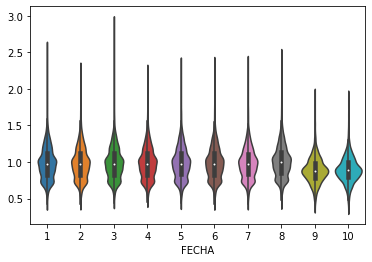

In [94]:
sns.violinplot(data=resumen_medida)

In [95]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [96]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,6741.000000,6698.000000,6893.000000,7064.000000,6939.000000,7130.000000,7362.000000,7317.000000,7633.000000,7520.000000,5716.000000,5517.000000
mean,0.986862,0.986459,0.986282,0.985155,0.989091,0.985250,0.981769,1.007998,0.889634,0.896711,-0.096479,-0.007082
std,0.222228,0.219783,0.218010,0.216290,0.218906,0.217622,0.211938,0.214597,0.172056,0.169812,0.170847,0.177239
min,0.424251,0.427115,0.443353,0.459624,0.432857,0.421675,0.423495,0.432636,0.367525,0.346936,-0.964745,-1.020891
25%,0.824723,0.824866,0.828721,0.824852,0.829139,0.826536,0.830247,0.854087,0.782884,0.790784,-0.199995,-0.061030
50%,0.976559,0.974808,0.974402,0.976436,0.977812,0.973474,0.973728,0.998418,0.880032,0.887337,-0.111612,0.000709
75%,1.127861,1.122591,1.120084,1.120176,1.123003,1.117394,1.111162,1.135050,0.991742,0.997354,0.015904,0.047504
max,2.567901,2.282624,2.918921,2.256057,2.353665,2.362262,2.378556,2.472470,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

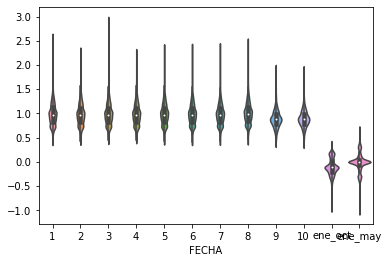

In [97]:
sns.violinplot(data=resumen_medida)

In [98]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,NaN,NaN,0.474946,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,0.680075,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.336661,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.112140,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.961424,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [99]:
resumen_medida.isnull().sum()

FECHA
1          2963
2          3006
3          2811
4          2640
5          2765
6          2574
7          2342
8          2387
9          2071
10         2184
ene_oct    3988
ene_may    4187
dtype: int64

In [100]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.305338
2          0.309769
3          0.289674
4          0.272053
5          0.284934
6          0.265251
7          0.241344
8          0.245981
9          0.213417
10         0.225062
ene_oct    0.410965
ene_may    0.431472
dtype: float64

In [101]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [102]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",119
"(-0.43, -0.163]",1772
"(-0.163, 0.104]",2823
"(0.104, 0.371]",997


## opcion2

In [103]:
resumen_medida['ene_oct'].quantile(0.05)

-0.35964126925660145

In [104]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.23248164336784172

###  Segunda parte

In [105]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [106]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [107]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [108]:
data_causal['ET'].value_counts()

0    2891534
1     342849
Name: ET, dtype: int64

In [109]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.893999
1    0.106001
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [110]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,0.714482,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,NaN,0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,0.414081,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,MADRID,MADRID,NaN,0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,2.877093,0.0,0.0,REGION COSTA,COSTA NORTE,CESAR,VALLEDUPAR,CESAR DISTRITO 1,NaN,0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,1.108223,0.0,3.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,-0.139428,0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,1.006936,0.0,0.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748387,90354179,PH5,@,5,1GV,2,0,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748388,8087598,CMB,@,100,CVB,4,0,0,0,0,...,2.063867,0.0,2.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,FLORIDABLANCA,DISTRITO FLORIDA 1,NaN,0
3748389,71164933,R30,@,30,BTC,2,0,0,0,0,...,0.441224,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.160395,0
3748390,71189674,5BA,@,5,P04,4,0,0,0,0,...,1.873057,0.0,1.0,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 3,-0.078399,0


In [111]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,3.234383e+06,3.234383e+06,3.234383e+06,3234383.0,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3.234383e+06,3234383.0,3.234383e+06,3234383.0,3234383.0,3234383.0,3234383.0,3.234383e+06
mean,-1.197384e-02,-5.859232e-03,-1.827458e-02,0.0,-5.306422e-03,-1.519826e-02,-6.437395e-03,-3.817111e-03,-6.382639e-02,-1.855068e-06,0.0,-1.775609e-03,0.0,0.0,0.0,0.0,-7.729449e-06
std,1.117349e-01,7.663235e-02,1.349522e-01,0.0,7.302097e-02,1.230665e-01,8.042192e-02,6.222874e-02,2.462706e-01,1.362008e-03,0.0,4.340232e-02,0.0,0.0,0.0,0.0,2.780178e-03
min,-4.000000e+00,-4.000000e+00,-4.000000e+00,0.0,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-1.000000e+00,0.0,-3.000000e+00,0.0,0.0,0.0,0.0,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


In [112]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [113]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

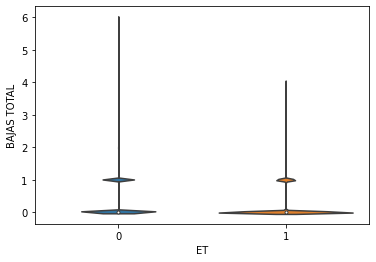

In [114]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

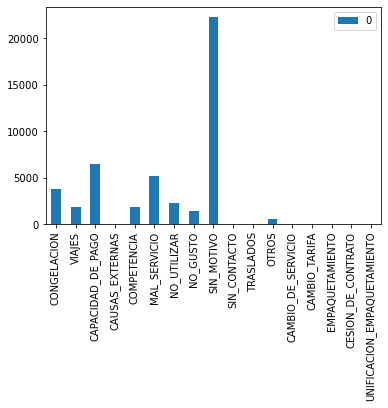

In [115]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

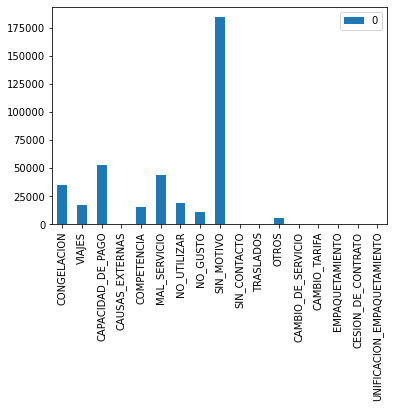

In [116]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [117]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,38728,3853,34875
VIAJES,18951,1897,17054
CAPACIDAD_DE_PAGO,59107,6529,52578
CAUSAS_EXTERNAS,0,0,0
COMPETENCIA,17163,1852,15311
MAL_SERVICIO,49157,5232,43925
NO_UTILIZAR,20821,2271,18550
NO_GUSTO,12346,1391,10955
SIN_MOTIVO,206439,22288,184151
SIN_CONTACTO,6,0,6


In [118]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=True)
resumen_causa_nor

,total,critico,normal
EMPAQUETAMIENTO,0.000000,0.000000,0.000000
CAUSAS_EXTERNAS,0.000000,0.000000,0.000000
CAMBIO_TARIFA,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000
SIN_CONTACTO,0.000029,0.000000,0.000033
UNIFICACION_EMPAQUETAMIENTO,0.000121,0.000135,0.000119
OTROS,0.027819,0.025350,0.028118
NO_GUSTO,0.059805,0.062410,0.059489


<Figure size 432x288 with 0 Axes>

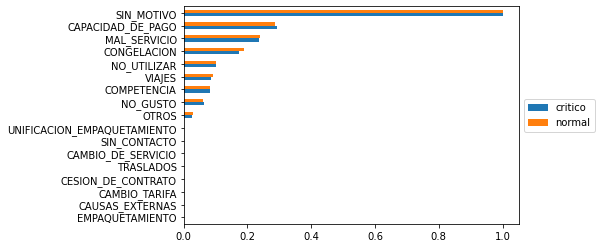

In [119]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [120]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [121]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
CAPACIDAD_DE_PAGO,0.286317,0.292938,0.285516,0.007422
NO_GUSTO,0.059805,0.062410,0.059489,0.002921
NO_UTILIZAR,0.100858,0.101893,0.100733,0.001161
UNIFICACION_EMPAQUETAMIENTO,0.000121,0.000135,0.000119,0.000015
EMPAQUETAMIENTO,0.000000,0.000000,0.000000,0.000000
CAUSAS_EXTERNAS,0.000000,0.000000,0.000000,0.000000
SIN_MOTIVO,1.000000,1.000000,1.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.000000,0.000000,0.000000
TRASLADOS,0.000000,0.000000,0.000000,0.000000
CESION_DE_CONTRATO,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

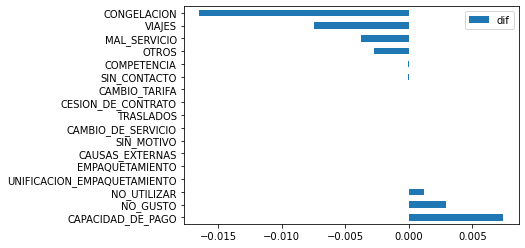

In [122]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [123]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 8


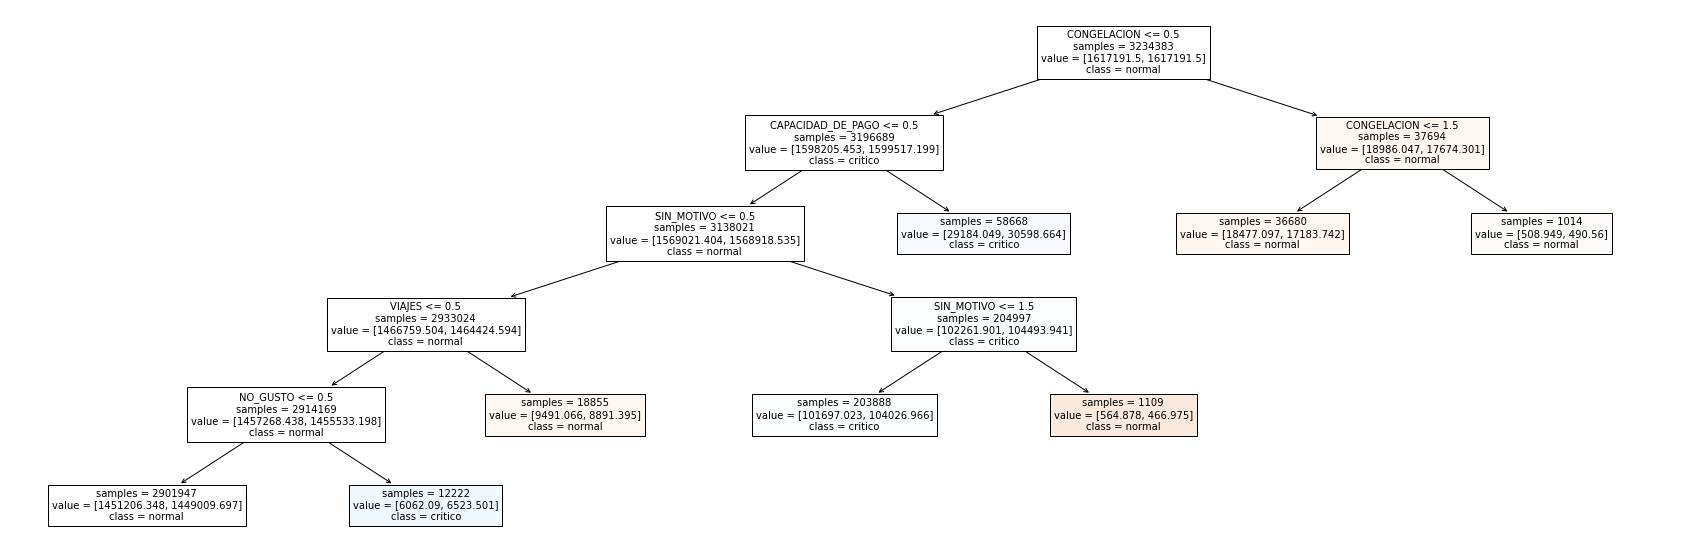

In [124]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

## INVOLUNTARIOS

In [125]:
data=data_total[data_total['INVOLUNTARIO']==-1]

In [126]:
seleccion_variables=['COD_NODO','FECHA','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [127]:
data[seleccion_variables].isnull().sum()

COD_NODO                            0
FECHA                               0
INVOLUNTARIO                        0
CD_BLANCOS_CAMBIOS_SERVICIO         0
AVG_TARIFA_TIGO                265783
AVG_TARIFA_ETB                 432261
AVG_TARIFA_MOVISTAR            291345
PROM_RENTA                      41354
dtype: int64

In [128]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA                          0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.517078
AVG_TARIFA_ETB                 0.840960
AVG_TARIFA_MOVISTAR            0.566809
PROM_RENTA                     0.080454
dtype: float64

In [129]:
data[seleccion_variables].describe()

,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,514009.000000,514009.0,514009.0,248226.000000,81748.000000,222664.000000,472655.000000
mean,6.223449,-1.0,0.0,120986.114649,95812.646018,102185.801468,94505.438578
std,3.295587,0.0,0.0,14057.918865,20415.262806,10002.996185,14781.706660
min,1.000000,-1.0,0.0,71990.000000,79900.000000,71990.000000,11342.000000
25%,3.000000,-1.0,0.0,112000.000000,79900.000000,96878.888889,85490.000000
50%,6.000000,-1.0,0.0,124000.000000,79900.000000,102900.000000,93641.000000
75%,9.000000,-1.0,0.0,130000.000000,117400.000000,112900.000000,104594.000000
max,11.000000,-1.0,0.0,163570.000000,149900.000000,112900.000000,231390.000000


In [130]:
#alfa=com/nuestro

In [131]:
data_medida=data[seleccion_variables].copy()

In [132]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [133]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [134]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [135]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [136]:
data_medida

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
9,UD4,11,-1,0,NaN,NaN,NaN,94282.0,NaN,NINGUNO,NaN
24,LOM1,2,-1,0,130000.000000,NaN,112900.000000,89010.0,112900.000000,AVG_TARIFA_MOVISTAR,1.268397
28,GIT,4,-1,0,117142.857143,NaN,100042.857143,80274.0,100042.857143,AVG_TARIFA_MOVISTAR,1.246267
32,BAB,1,-1,0,115000.000000,79900.0,97900.000000,108907.0,79900.000000,AVG_TARIFA_ETB,0.733653
53,IEL,11,-1,0,NaN,NaN,NaN,75574.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3748338,1GV,11,-1,0,NaN,NaN,NaN,95346.0,NaN,NINGUNO,NaN
3748346,PAN,2,-1,0,100000.000000,NaN,82900.000000,109801.0,82900.000000,AVG_TARIFA_MOVISTAR,0.755002
3748353,GA5,5,-1,0,122500.000000,79900.0,105400.000000,108388.0,79900.000000,AVG_TARIFA_ETB,0.737166
3748359,SVI,2,-1,0,130000.000000,NaN,112900.000000,96159.0,112900.000000,AVG_TARIFA_MOVISTAR,1.174097


In [137]:
resumen_medida=pd.pivot_table(data_medida[['FECHA','COD_NODO','ALFA_tarifa']], columns='FECHA', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562
0AL,NaN,NaN,NaN,NaN,0.728679,NaN,NaN,NaN,NaN,0.474946
0AO,NaN,NaN,NaN,1.077074,NaN,NaN,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,NaN,1.033125,1.029064
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,NaN,1.159577,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,NaN,0.894125,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562


In [138]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA')

,COD_NODO,FECHA,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
959350,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
1020694,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
993910,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
925942,01S,1,-1,0,NaN,NaN,NaN,89601.0,NaN,NINGUNO,NaN
11134,01S,2,-1,0,NaN,NaN,NaN,90711.0,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
941924,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
941492,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
935732,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN
903764,01S,11,-1,0,NaN,NaN,NaN,90819.0,NaN,NINGUNO,NaN


In [139]:
resumen_medida.isnull().sum()

FECHA
1     3384
2     3689
3     3569
4     3443
5     3277
6     3359
7     3084
8     7173
9     2368
10    2673
dtype: int64

In [140]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1     0.397837
2     0.433694
3     0.419586
4     0.404773
5     0.385257
6     0.394898
7     0.362568
8     0.843287
9     0.278392
10    0.314249
dtype: float64

<AxesSubplot:xlabel='FECHA'>

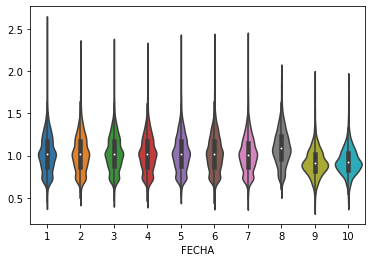

In [141]:
sns.violinplot(data=resumen_medida)

In [142]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [143]:
resumen_medida.describe()

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
count,5122.000000,4817.000000,4937.000000,5063.000000,5229.000000,5147.000000,5422.000000,1333.000000,6138.000000,5833.000000,4127.000000,3987.000000
mean,1.025305,1.030343,1.031956,1.025179,1.029701,1.026143,1.018659,1.098351,0.921733,0.934736,-0.096583,-0.009041
std,0.223148,0.221337,0.217072,0.216118,0.218237,0.219871,0.212693,0.212232,0.164049,0.159878,0.179495,0.185980
min,0.450003,0.493676,0.475745,0.466443,0.515531,0.443615,0.435068,0.600706,0.367525,0.421670,-0.964745,-1.020891
25%,0.864059,0.869064,0.878699,0.869432,0.872566,0.862944,0.869966,0.958174,0.819999,0.833521,-0.206837,-0.059284
50%,1.014120,1.017209,1.020117,1.017530,1.018974,1.016341,1.008625,1.084405,0.906801,0.918679,-0.119835,0.000203
75%,1.174363,1.178140,1.177636,1.168661,1.171372,1.170336,1.153175,1.230987,1.020806,1.030562,0.036485,0.045928
max,2.567901,2.282624,2.302515,2.256057,2.353665,2.362262,2.378556,1.976976,1.943738,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA'>

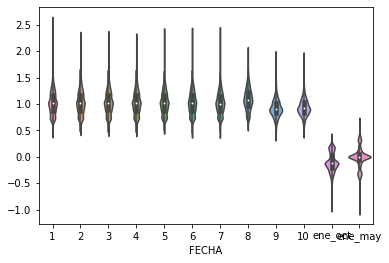

In [144]:
sns.violinplot(data=resumen_medida)

In [145]:
resumen_medida

FECHA,1,2,3,4,5,6,7,8,9,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,NaN,NaN,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.909536,1.103387,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,NaN,NaN,0.728679,NaN,NaN,NaN,NaN,0.474946,NaN,NaN
0AO,NaN,NaN,NaN,1.077074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,NaN,1.033125,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,NaN,1.159577,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,NaN,0.894125,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.195050,1.040057,1.041562,-0.130779,0.002037


In [146]:
resumen_medida.isnull().sum()

FECHA
1          3384
2          3689
3          3569
4          3443
5          3277
6          3359
7          3084
8          7173
9          2368
10         2673
ene_oct    4379
ene_may    4519
dtype: int64

In [147]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA
1          0.397837
2          0.433694
3          0.419586
4          0.404773
5          0.385257
6          0.394898
7          0.362568
8          0.843287
9          0.278392
10         0.314249
ene_oct    0.514813
ene_may    0.531272
dtype: float64

In [148]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [149]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",96
"(-0.43, -0.163]",1362
"(-0.163, 0.104]",1866
"(0.104, 0.371]",798


## opcion2

In [150]:
resumen_medida['ene_oct'].quantile(0.05)

-0.36973423859158505

In [151]:
corte=resumen_medida['ene_oct'].quantile(0.20)
corte

-0.23872831347323645

###  Segunda parte

In [152]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [153]:
(data[seleccionVariables]==0).sum()

CONGELACION                    496343
VIAJES                         513464
CAPACIDAD_DE_PAGO              513808
CAUSAS_EXTERNAS                512436
COMPETENCIA                    514009
MAL_SERVICIO                   513697
NO_UTILIZAR                    512388
NO_GUSTO                       513497
SIN_MOTIVO                     513732
SIN_CONTACTO                   509407
TRASLADOS                      514009
OTROS                          513467
CAMBIO_DE_SERVICIO             514009
CAMBIO_TARIFA                  513760
EMPAQUETAMIENTO                514009
CESION_DE_CONTRATO             514009
UNIFICACION_EMPAQUETAMIENTO    513815
dtype: int64

In [154]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [155]:
data_causal['ET']=np.where(data_causal['ene_oct']<=corte,1,0)

In [156]:
data_causal['ET'].value_counts()

0    460217
1     53792
Name: ET, dtype: int64

In [157]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.895348
1    0.104652
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [158]:
data_causal

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
9,30223636,MH1,@,15,UD4,2,-1,0,0,0,...,0.576565,1.0,0.0,REGION COSTA,COSTA NORTE,BARRANQUILLA 1,BARRANQUILLA,BARRANQUILLA 1 DISTRITO 4,-0.247604,1
24,24894327,R30,@,30,LOM1,2,-1,0,0,0,...,0.872224,0.0,0.0,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 4,-0.118797,0
28,36942049,RQM,@,15,GIT,1,-1,0,0,0,...,1.473971,0.0,0.0,REGION OCCIDENTE,TOLHUCA,TOLIMA,IBAGUE,TOLIMA DISTRITO 2,0.192738,0
32,28544974,BC7,@,75,BAB,3,-1,0,0,0,...,0.643162,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,ROMA,0.186336,0
53,42058061,MH2,@,23,IEL,2,-1,0,0,0,...,0.054032,0.0,2.0,REGION ORIENTE,SANBOY,NORTE DE SANTANDER,CUCUTA,DISTRITO CUCUTA 4,-0.142559,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748338,70261516,NB2,@,50,1GV,2,-1,0,0,0,...,1.686854,0.0,2.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN NORTE,BELLO,BELLO NORTE,NaN,0
3748346,83007724,RB3,@,30,PAN,3,-1,0,0,0,...,1.752191,0.0,0.0,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 4,-0.079492,0
3748353,79554518,D3V,@,160,GA5,3,-1,0,0,0,...,NaN,0.0,0.0,REGION CENTRO,BOGOTA ORIENTE,GALAN,BOGOTA,AMERICAS,0.099258,0
3748359,25691003,PH5,@,5,SVI,2,-1,0,0,0,...,1.056041,0.0,0.0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,ENGATIVA,NaN,0


In [159]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,514009.000000,514009.000000,514009.000000,514009.000000,514009.0,514009.000000,514009.000000,514009.00000,514009.000000,514009.000000,514009.0,514009.000000,514009.0,514009.000000,514009.0,514009.0,514009.000000
mean,-0.034383,-0.001078,-0.000391,-0.003078,0.0,-0.000609,-0.003173,-0.00100,-0.000545,-0.008990,0.0,-0.001058,0.0,-0.000523,0.0,0.0,-0.000387
std,0.182807,0.033342,0.019771,0.055812,0.0,0.024748,0.056586,0.03173,0.023664,0.094842,0.0,0.032635,0.0,0.024671,0.0,0.0,0.020161
min,-9.000000,-2.000000,-1.000000,-4.000000,0.0,-2.000000,-2.000000,-2.00000,-3.000000,-4.000000,0.0,-2.000000,0.0,-3.000000,0.0,0.0,-2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
max,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [160]:
data_causal[seleccionVariables]=data_causal[seleccionVariables]*-1

In [161]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

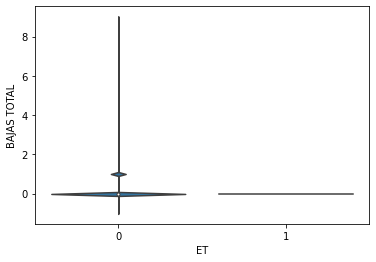

In [162]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

In [163]:
data_causal[(data_causal['BAJAS TOTAL']>0)&(data_causal['ET']==1)]

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET,BAJAS TOTAL


In [164]:
data_causal[data_causal['ET']==1]

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET,BAJAS TOTAL
9,30223636,MH1,@,15,UD4,2,-1,0,0,0,...,1.0,0.0,REGION COSTA,COSTA NORTE,BARRANQUILLA 1,BARRANQUILLA,BARRANQUILLA 1 DISTRITO 4,-0.247604,1,0
110,13781839,R30,@,30,BE2,2,-1,0,0,0,...,0.0,0.0,REGION CENTRO,BOGOTA SUR,BOSA,BOGOTA,FERROCARRIL,-0.307819,1,0
119,39673336,TP3,@,30,LIL,2,-1,0,0,0,...,2.0,0.0,REGION OCCIDENTE,VACANA,VALLE,TULUA,VALLE DISTRITO 4,-0.247821,1,0
268,87301826,NB3,@,100,RV1,3,-1,0,0,0,...,0.0,5.0,REGION NOROCCIDENTE,EJE CAFETERO,CALDAS,MANIZALES,MANIZALES CALDAS4,-0.316593,1,0
364,82350257,BC7,@,75,I1S1,2,-1,0,0,0,...,0.0,0.0,REGION CENTRO,BOGOTA SUR,MADELENA,BOGOTA,ALEJANDRA,-0.263304,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746725,28180335,R75,@,75,JSO,3,-1,0,0,0,...,0.0,0.0,REGION ORIENTE,SANBOY,BOYACA,TUNJA,TUNJA SUR,-0.519051,1,0
3746919,21171406,NB3,@,100,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0
3747045,5632255,R1R,@,15,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0
3747519,25408119,D1V,@,60,PYR,3,-1,0,0,0,...,0.0,0.0,REGION NOROCCIDENTE,MEDELLIN,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,-0.247381,1,0


<AxesSubplot:>

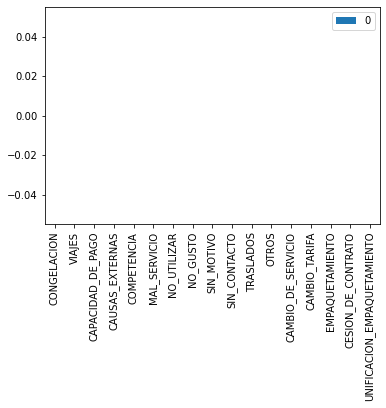

In [165]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

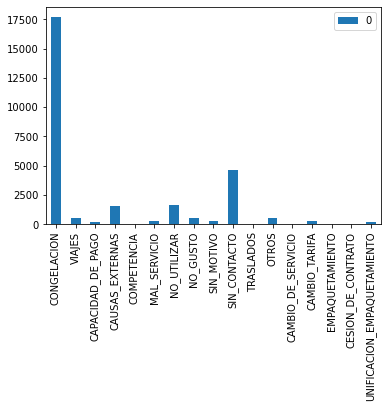

In [166]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [167]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,17673,0,17673
VIAJES,554,0,554
CAPACIDAD_DE_PAGO,201,0,201
CAUSAS_EXTERNAS,1582,0,1582
COMPETENCIA,0,0,0
MAL_SERVICIO,313,0,313
NO_UTILIZAR,1631,0,1631
NO_GUSTO,514,0,514
SIN_MOTIVO,280,0,280
SIN_CONTACTO,4621,0,4621


In [168]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor=resumen_causa_nor.sort_values('total', ascending=False)
resumen_causa_nor

,total,critico,normal
CONGELACION,1.000000,0.0,1.000000
SIN_CONTACTO,0.261472,0.0,0.261472
NO_UTILIZAR,0.092288,0.0,0.092288
CAUSAS_EXTERNAS,0.089515,0.0,0.089515
VIAJES,0.031347,0.0,0.031347
OTROS,0.030781,0.0,0.030781
NO_GUSTO,0.029084,0.0,0.029084
MAL_SERVICIO,0.017711,0.0,0.017711
SIN_MOTIVO,0.015843,0.0,0.015843
CAMBIO_TARIFA,0.015221,0.0,0.015221


<Figure size 432x288 with 0 Axes>

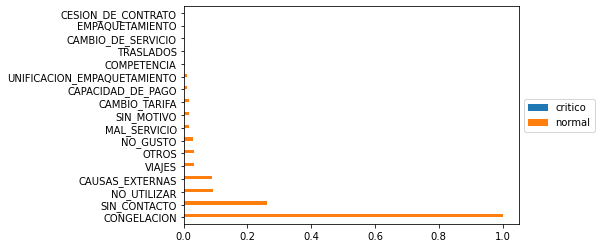

In [169]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [170]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [171]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
CESION_DE_CONTRATO,0.000000,0.0,0.000000,0.000000
EMPAQUETAMIENTO,0.000000,0.0,0.000000,0.000000
CAMBIO_DE_SERVICIO,0.000000,0.0,0.000000,0.000000
TRASLADOS,0.000000,0.0,0.000000,0.000000
COMPETENCIA,0.000000,0.0,0.000000,0.000000
UNIFICACION_EMPAQUETAMIENTO,0.011260,0.0,0.011260,-0.011260
CAPACIDAD_DE_PAGO,0.011373,0.0,0.011373,-0.011373
CAMBIO_TARIFA,0.015221,0.0,0.015221,-0.015221
SIN_MOTIVO,0.015843,0.0,0.015843,-0.015843
MAL_SERVICIO,0.017711,0.0,0.017711,-0.017711


<AxesSubplot:>

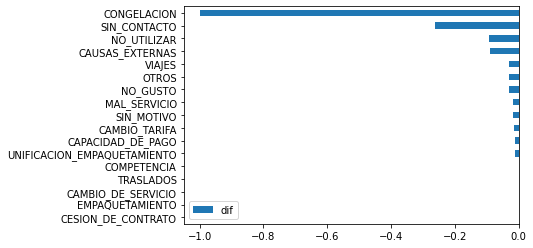

In [172]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [173]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 6


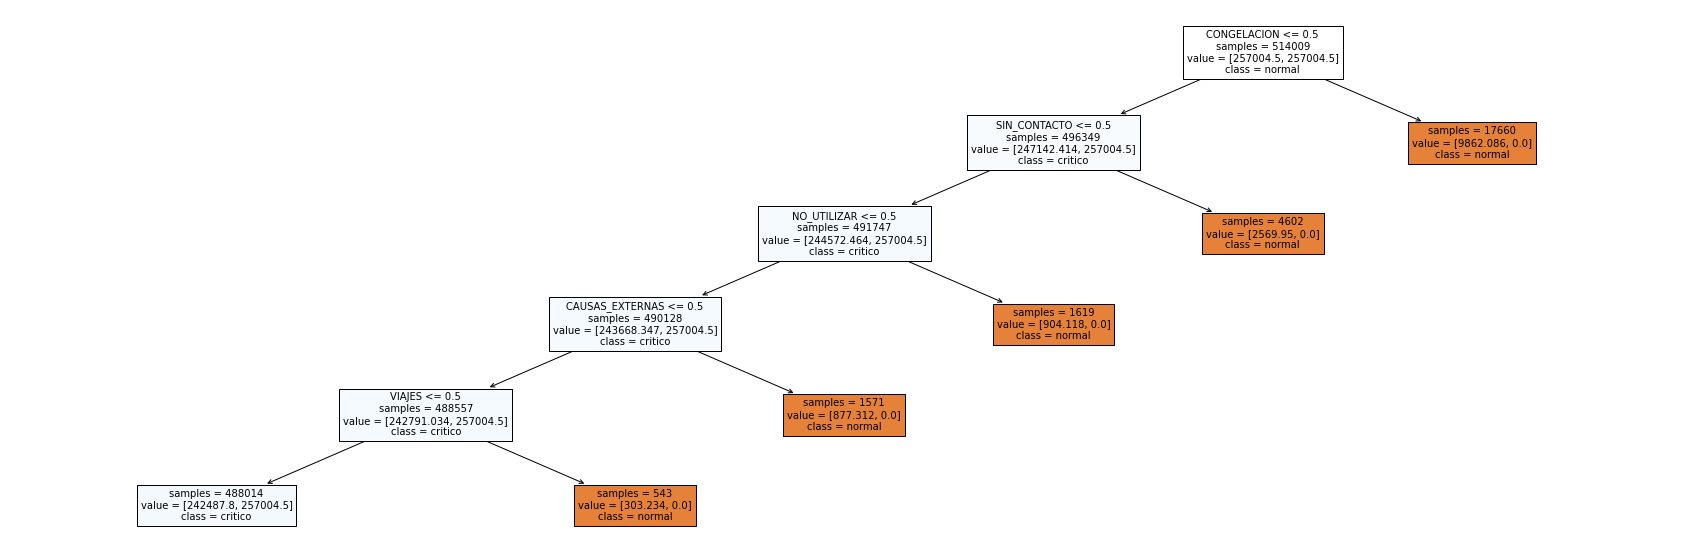

In [174]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)